<a href="https://colab.research.google.com/github/anapaulaw/Estatistica/blob/main/REGRESS%C3%83O_MULTIPLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autor : Ana Paula Vanderley

Especialista em Estatística

Data: 01/04/2023

# REGRESSÃO MULTIPLA

---
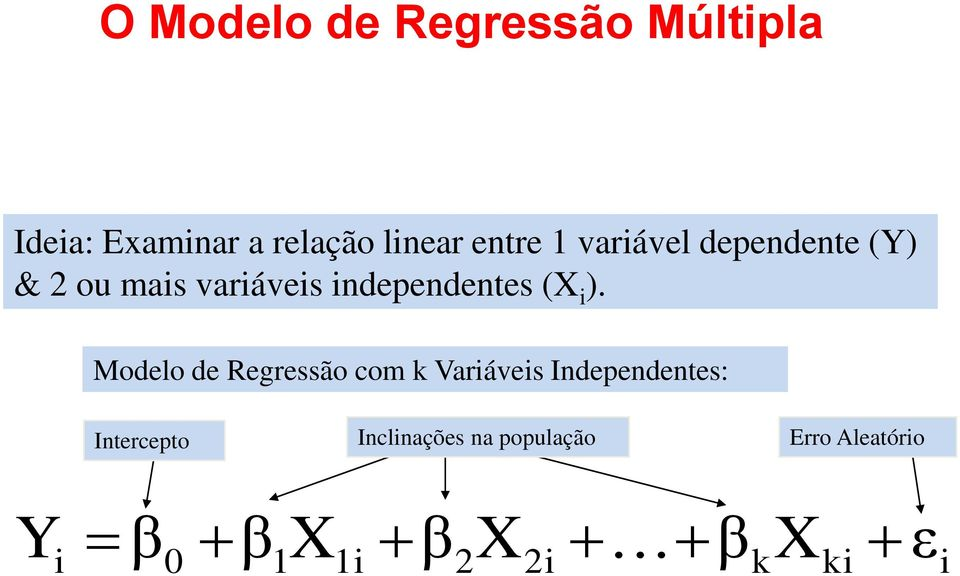


Aqui somente para fins de exemplo vamos avaliar a relação linear da variavel dependente  Oxigênio com as demais variaáveis explicativas .
Os dados usados nesse trabalho são de indivíduos adultos do sexo masculino envolvidos num curso de ginastica (condicionamento físico).


---


As variáveis medidas
foram:

*  IDADE - Idade (em anos) – IDADE
*  PESO - Peso (em kg) – PESO
*  OXIGEN - Taxa de consumo de oxigênio (ml por kg de peso, por minuto)
*  TEMPO - Tempo para correr 1.5 milhas (em minutos)
*  ICREP - Índice cardíaco em repouso
*  ICCOR - Índice cardíaco durante a corrida (momento de mensuração da taxa de oxigênio)
*  ICMAX - Índice cardíaco máximo registrado durante a corrida


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

CARREGANDO E VISUALIZANDO O BANCO DE DADOS

---



In [ ]:
data = pd.read_csv('fitness.csv' , sep = ';')
data.head(10)

,IDADE,PESO,OXIGEN,TEMPO,ICREP,ICCOR,ICMAX
0,44,89.47,44.609,11.37,62,178,182
1,40,75.07,45.313,10.07,62,185,185
2,44,85.84,54.297,8.65,45,156,168
3,42,68.15,59.571,8.17,40,166,172
4,38,89.02,49.874,9.22,55,178,180
5,47,77.45,44.811,11.63,58,176,176
6,40,75.98,45.681,11.95,70,176,180
7,43,81.19,49.091,10.85,64,162,170
8,44,81.42,39.442,13.08,63,174,176
9,38,81.87,60.055,8.63,48,170,186


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IDADE   31 non-null     int64  
 1   PESO    31 non-null     float64
 2   OXIGEN  31 non-null     float64
 3   TEMPO   31 non-null     float64
 4   ICREP   31 non-null     int64  
 5   ICCOR   31 non-null     int64  
 6   ICMAX   31 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 1.8 KB


MEDIDAS DESCRITIVAS

---



In [ ]:
data.describe()

,IDADE,PESO,OXIGEN,TEMPO,ICREP,ICCOR,ICMAX
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,47.677419,77.444516,47.375806,10.586129,53.451613,169.645161,173.774194
std,5.211443,8.328568,5.327231,1.387414,7.619443,10.251986,9.164095
min,38.000000,59.080000,37.388000,8.170000,40.000000,146.000000,155.000000
25%,44.000000,73.200000,44.964500,9.780000,48.000000,163.000000,168.000000
50%,48.000000,77.450000,46.774000,10.470000,52.000000,170.000000,172.000000
75%,51.000000,82.325000,50.131000,11.270000,58.500000,176.000000,180.000000
max,57.000000,91.630000,60.055000,14.030000,70.000000,186.000000,192.000000


CORRELAÇÃO

---
Pela análise de correlação podemos verificar quais variáveis do banco de dados possui uma correlação linear positiva e negativa e qual a força dessa correlação.


In [ ]:
data.corr()

,IDADE,PESO,OXIGEN,TEMPO,ICREP,ICCOR,ICMAX
IDADE,1.000000,-0.233539,-0.304592,0.188745,-0.164100,-0.337870,-0.432916
PESO,-0.233539,1.000000,-0.162753,0.143508,0.043974,0.181516,0.249381
OXIGEN,-0.304592,-0.162753,1.000000,-0.862195,-0.399356,-0.397974,-0.236740
TEMPO,0.188745,0.143508,-0.862195,1.000000,0.450383,0.313648,0.226103
ICREP,-0.164100,0.043974,-0.399356,0.450383,1.000000,0.352461,0.305124
ICCOR,-0.337870,0.181516,-0.397974,0.313648,0.352461,1.000000,0.929754
ICMAX,-0.432916,0.249381,-0.236740,0.226103,0.305124,0.929754,1.000000


No gráfico de Heatmap podemos ver de forma mais clara as correlaões e sua força.
Podemos notar que a variável OXIGEN tem uma correlação negativa maior com as variáveis TEMPO , ICREP e ICCOR.

<Axes: >

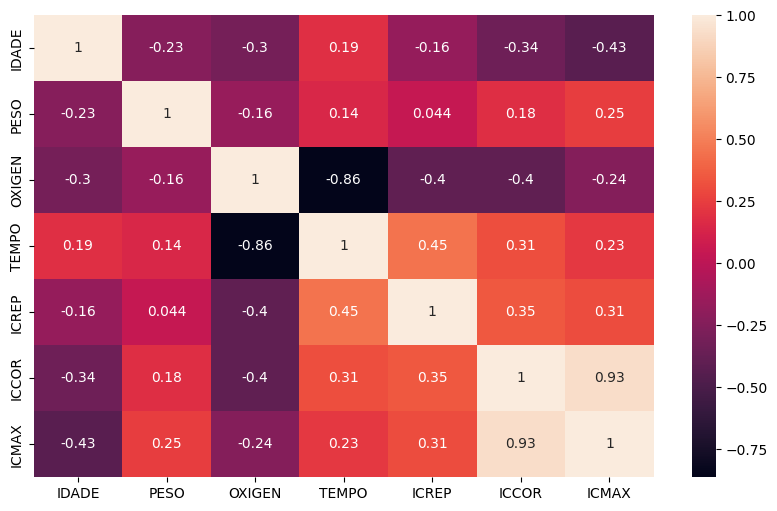

In [ ]:
figura = plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True)

ESPECIFICANDO O LIMITE DE CORRELAÇÃO

---
Podemos definir um limite de correlação aceitavél nesse caso filtramos a variável com um limite de correlação acima de 30%. Os resultados retornaram 4 variáveis que possuem uma correlação maior que 0.3.


In [ ]:
correlation_matrix = data.corr()

In [ ]:
limite_correlacao = 0.3

for coluna in correlation_matrix.columns:
    if coluna != 'OXIGEN':
        correlacao = correlation_matrix[coluna]['OXIGEN']
        if abs(correlacao) > limite_correlacao:
            print(f"A variável {coluna} apresenta uma correlação significativa com a variável dependente.")

A variável IDADE apresenta uma correlação significativa com a variável dependente.
A variável TEMPO apresenta uma correlação significativa com a variável dependente.
A variável ICREP apresenta uma correlação significativa com a variável dependente.
A variável ICCOR apresenta uma correlação significativa com a variável dependente.


In [ ]:
#variaveis significativas selecionadas usando a correlação
X = data[['IDADE','TEMPO', 'ICCOR', 'ICMAX']]
y = data['OXIGEN']

VISUALIZAÇÃO GRÁFICA

---



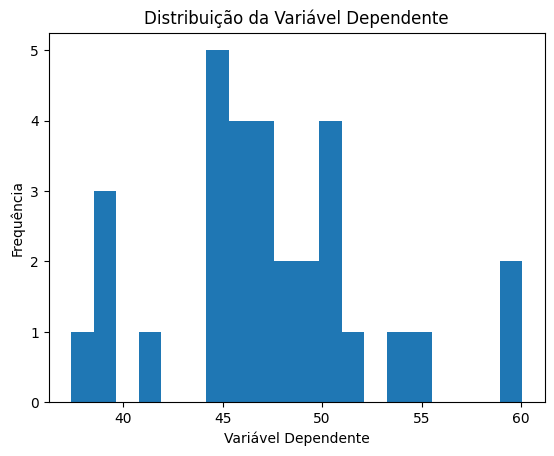

In [ ]:
plt.hist(data['OXIGEN'], bins=20)
plt.xlabel('Variável Dependente')
plt.ylabel('Frequência')
plt.title('Distribuição da Variável Dependente')
plt.show()

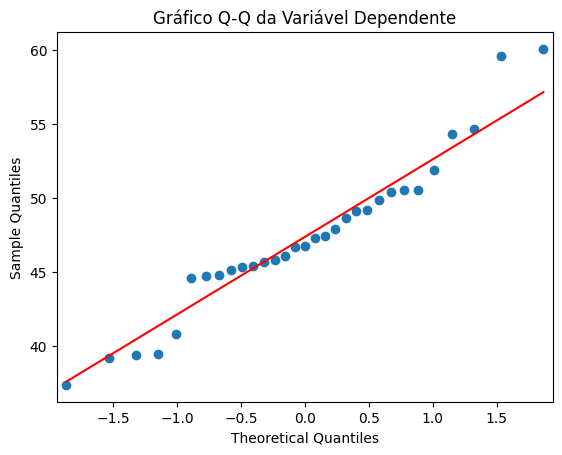

In [ ]:
sm.qqplot(data['OXIGEN'], line='s')
plt.title('Gráfico Q-Q da Variável Dependente')
plt.show()

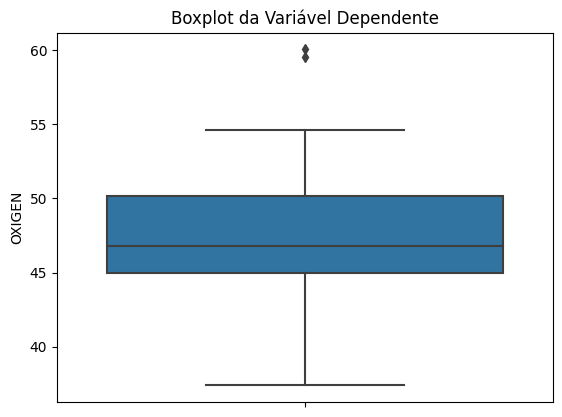

In [ ]:
sns.boxplot(y=data['OXIGEN'])
plt.title('Boxplot da Variável Dependente')
plt.show()

SEPARANDO DADOS DE TREINO E TESTE E ESCALONANDO AS VARIAVEIS

---



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

MODELO REGRESSÃO MULTIPLA

---



In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
model.intercept_

46.676458333333336

In [ ]:
model.coef_

array([-0.82280003, -3.65325201, -1.9988832 ,  1.11434392])

Podemos inferir que as variáveis independentes estão associadas a mudanças na quantidade de oxigênio, e os coeficientes acima fornecem uma estimativa da direção e magnitude dessas mudanças.

**IDADE** (-0.8228): Para cada aumento unitário na idade, espera-se uma diminuição de 0.8228 unidades de OXIGENIO.

**TEMPO** (-3.6533): Para cada aumento unitário no tempo, espera-se uma diminuição de 3.6533 unidades de OXIGENIO.

**ICCOR** (-1.9989): Para cada aumento unitário no Índice cardíaco durante a corrida , espera-se uma diminuição de 1.9989 unidades de OXIGENIO.

**ICMAX** (1.1143): Para cada aumento unitário no Índice cardíaco Máximo durante a corrida, espera-se um aumento de 1.1143 unidades de OXIGENIO.





PREVISÕES

---



In [ ]:
y_pred = model.predict(X_test_scaled)
y_pred

array([49.82617476, 50.93080554, 54.27720174, 49.29534932, 40.18000553,
       56.03975657, 44.88342495])

ACURÁCIA DO MODELO

---



In [ ]:
from sklearn.metrics import r2_score
from yellowbrick.regressor import PredictionError

In [ ]:
precisao = r2_score(y_test, y_pred)
print("Precisão do modelo:", precisao)

Precisão do modelo: 0.8537814585697538


In [ ]:
visualizer = PredictionError(model)

In [ ]:
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)

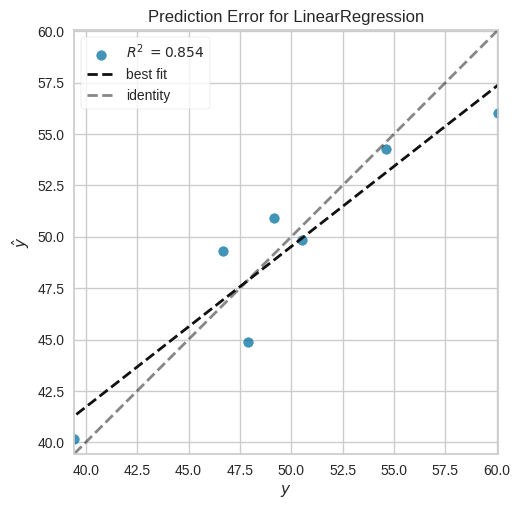

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
visualizer.show()

 O modelo indica que cerca de 85.4% da variabilidade da variável dependente (y) é explicada pelas variáveis independentes (x) incluídas no modelo de regressão linear múltipla.

O coeficiente de determinação R2 mede se o modelo se ajusta bem aos dados nesse caso o modelo é capaz de explicar uma grande parte da variação observada nos dados de teste.